In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cyclistes = pd.read_csv("https://raw.githubusercontent.com/romainjouin/formation_python/master/cyclistes.csv")
cyclistes

,id,sexe,sportivite,age,sur_velo
0,101,F,-0.285718,66,True
1,102,H,2.219441,37,True
2,103,F,2.637251,49,True
3,104,F,1.413551,33,True
4,105,H,-1.331255,36,True
...,...,...,...,...,...
995,1096,H,1.207463,80,True
996,1097,H,1.651872,47,True
997,1098,H,4.415284,40,False
998,1099,F,0.205798,77,True


In [19]:
result_df = pd.DataFrame()
for sexe in cyclistes.sexe.unique():
    data_serie = cyclistes[cyclistes.sexe == sexe]["sportivite"]
    data_df    = pd.DataFrame({"%s"%sexe : data_serie})
    result_df  = pd.concat([result_df, data_df], axis=1)
result_df.head()

,F,H
0,-0.285718,NaN
1,NaN,2.219441
2,2.637251,NaN
3,1.413551,NaN
4,NaN,-1.331255


<AxesSubplot:>

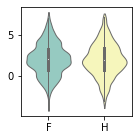

In [22]:
largeur_figure = 2
hauteur_figure = 2
plt.figure(figsize=(largeur_figure, hauteur_figure))
sns.violinplot(data=result_df, palette="Set3", bw=.2, cut=1, linewidth=1)

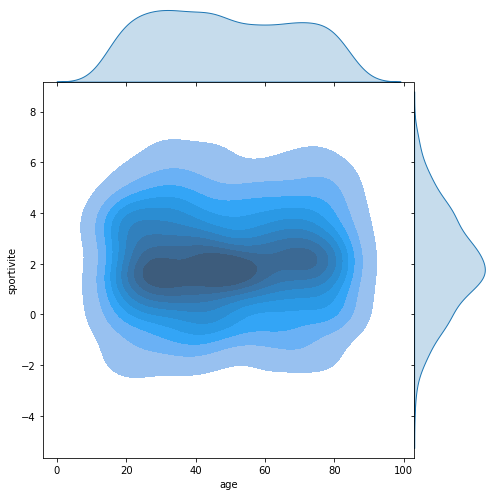

In [38]:
sns.jointplot(x=cyclistes["age"], y=cyclistes["sportivite"], kind="kde", height=7, space=0, fill=True)

In [74]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import row, column
from bokeh.plotting import figure
from bokeh.models import HoverTool

output_notebook()

femmes = cyclistes[cyclistes.sexe=='F']
hommes = cyclistes[(cyclistes.sexe=='H') & (cyclistes.age > 50) ]

opts = dict(plot_width=250, plot_height=250, min_border=0)

p1 = figure(**opts, title='Femmes')
hover= HoverTool(tooltips=[("sportivite", "$y")])
p1.add_tools(hover)
p1.circle(x=femmes.age, y=femmes.sportivite, size=1)

p2 = figure(**opts, title="Hommes")
p2.add_tools(hover)
p2.circle(x=hommes.age, y=hommes.sportivite, size=1)

t = show(row(p1, p2), notebook_handle=True)
hommes

Loading BokehJS ...

,id,sexe,sportivite,age,sur_velo
6,107,H,3.334480,69,False
8,109,H,4.742018,57,True
11,112,H,-2.016611,84,True
12,113,H,1.107883,55,True
15,116,H,-0.100969,82,True
...,...,...,...,...,...
978,1079,H,2.496401,75,True
979,1080,H,-0.392186,71,True
986,1087,H,3.779769,66,True
993,1094,H,3.292064,73,True
